In [1]:
import torch
from ppuu.data.dataloader import Dataset, DataStore
from torch.utils.data import DataLoader

ds_path = "/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/traffic-data-5/state-action-cost/data_i80_v0"
# ds_path = "/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/traffic-data_offroad_50_test_train_same/state-action-cost/data_i80_v0/"
data_store = DataStore(ds_path)

# dataset = Dataset(
#     data_store, "train", 20, 30, normalize=False, shift=False, random_actions=False,
# )

# loader = DataLoader(
#     dataset,
#     batch_size=10,
#     num_workers=0,
# )

In [2]:
all_actions = torch.cat(data_store.actions, dim=0)
print(all_actions.min(dim=0))
print(all_actions.mean(dim=0))
print(all_actions.std(dim=0))

torch.return_types.min(
values=tensor([-4.0000e+01, -1.0000e-02]),
indices=tensor([12099, 84573]))
tensor([ 2.4562e-01, -2.9329e-05])
tensor([5.0677e+00, 2.1137e-03])


In [3]:
((all_actions - all_actions.mean(dim=0)) / all_actions.std(dim=0)).abs().max(dim=0)

torch.return_types.max(
values=tensor([7.9417, 4.7449]),
indices=tensor([12099, 84586]))

In [4]:
all_actions.max(dim=0)

torch.return_types.max(
values=tensor([4.0000e+01, 1.0000e-02]),
indices=tensor([15121, 84586]))

(array([6.88300e+03, 9.50000e+01, 4.86600e+03, 2.33000e+02, 6.97300e+03,
        8.16900e+03, 8.44600e+03, 8.78100e+03, 7.17800e+03, 6.11900e+03,
        4.75800e+03, 4.64400e+03, 4.89700e+03, 5.02200e+03, 5.15000e+03,
        5.88200e+03, 7.13900e+03, 8.51000e+03, 1.17140e+04, 1.61500e+04,
        2.36080e+04, 3.75560e+04, 6.82250e+04, 1.28581e+05, 6.92174e+05,
        6.50339e+05, 1.18012e+05, 5.75760e+04, 3.25100e+04, 2.13440e+04,
        1.48960e+04, 1.09110e+04, 7.97200e+03, 6.74000e+03, 5.48700e+03,
        4.83000e+03, 5.03500e+03, 5.01700e+03, 4.66300e+03, 4.60300e+03,
        6.49100e+03, 7.19700e+03, 8.28600e+03, 8.27400e+03, 7.79400e+03,
        6.66100e+03, 2.21000e+02, 4.67600e+03, 9.10000e+01, 6.62800e+03]),
 array([-4.71719   , -4.527947  , -4.3387046 , -4.1494617 , -3.9602194 ,
        -3.7709768 , -3.5817342 , -3.3924913 , -3.2032487 , -3.0140061 ,
        -2.8247635 , -2.635521  , -2.4462783 , -2.2570357 , -2.0677931 ,
        -1.8785505 , -1.6893078 , -1.5000652 , -1

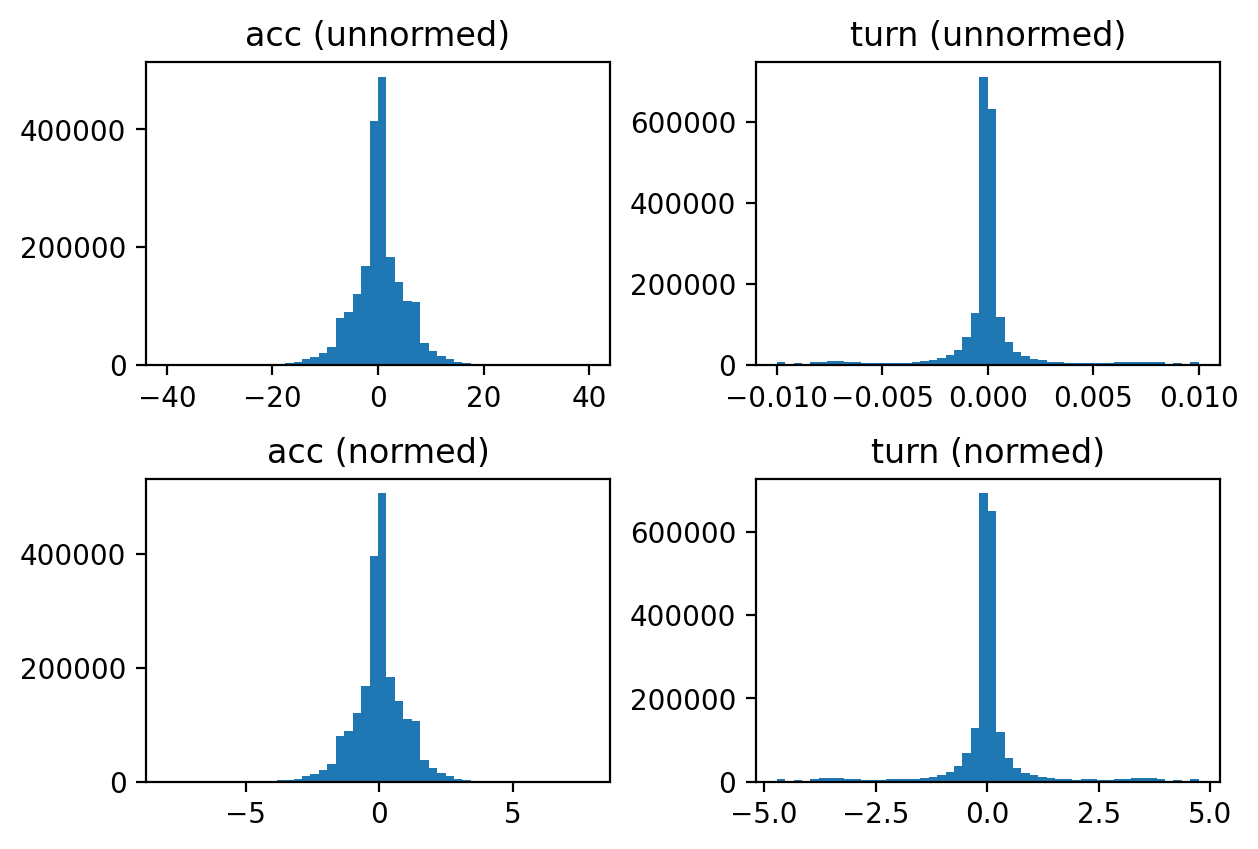

<Figure size 1200x800 with 0 Axes>

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2, dpi=200)
fig.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.figure(dpi=200)

mean = all_actions.mean(dim=0)
std = all_actions.std(dim=0)

ax[0][0].set_title('acc (unnormed)')
ax[0][0].hist(all_actions[:, 0], bins=50, label='acc')

ax[0][1].set_title('turn (unnormed)')
ax[0][1].hist(all_actions[:, 1], bins=50, label='turn')

ax[1][0].set_title('acc (normed)')
ax[1][0].hist((all_actions[:, 0] - mean[0]) / std[0], bins=50, label='acc')

ax[1][1].set_title('turn (normed)')
ax[1][1].hist((all_actions[:, 1] - mean[1]) / std[1], bins=50, label='turn')

# States

In [18]:
from ppuu.data.constants import UnitConverter

all_states = torch.cat(data_store.states, dim=0)[:, 0, :] # 0 is ego car, rest is not filled
print(all_states.shape)
print('min', all_states.min(dim=0).values)
print('max', all_states.max(dim=0).values)
print('mean', all_states.mean(dim=0))
print('std', all_states.std(dim=0))

mean_vals = all_states.mean(dim=0)
print(UnitConverter.pixels_per_s_to_kmph(44.4))
print(UnitConverter.kmph_to_pixels_per_s(80))

torch.Size([2088007, 5])
min tensor([234.2352,  36.2176,   0.8995,  -0.4369,   0.0000])
max tensor([1.6169e+03, 2.1815e+02, 1.0000e+00, 3.6920e-01, 1.7431e+02])
mean tensor([ 8.8736e+02,  1.1778e+02,  9.9935e-01, -7.2018e-03,  3.6593e+01])
std tensor([3.9225e+02, 4.4064e+01, 2.5647e-03, 3.5306e-02, 2.4535e+01])
24.642
144.14414414414412


In [19]:
all_states.shape

torch.Size([2088007, 5])

(array([1.13007e+05, 4.67020e+04, 1.13720e+05, 9.94910e+04, 9.94020e+04,
        1.65176e+05, 9.71490e+04, 9.20770e+04, 1.71173e+05, 9.19200e+04,
        9.32390e+04, 1.66441e+05, 8.44170e+04, 8.39980e+04, 1.24851e+05,
        5.81400e+04, 7.35420e+04, 5.84790e+04, 3.14350e+04, 4.17440e+04,
        2.30760e+04, 1.67360e+04, 2.76730e+04, 1.51060e+04, 1.11390e+04,
        1.57430e+04, 8.85900e+03, 8.34600e+03, 1.06740e+04, 6.49100e+03,
        6.86300e+03, 7.19700e+03, 4.20600e+03, 3.91500e+03, 3.44000e+03,
        1.65900e+03, 1.87100e+03, 1.62000e+03, 1.25300e+03, 1.58200e+03,
        1.09700e+03, 1.03900e+03, 8.55000e+02, 6.88000e+02, 3.76000e+02,
        2.50000e+02, 1.00000e+02, 3.30000e+01, 1.00000e+01, 7.00000e+00]),
 array([-1.4914856 , -1.3493896 , -1.2072935 , -1.0651973 , -0.9231013 ,
        -0.78100526, -0.63890916, -0.4968131 , -0.35471702, -0.21262096,
        -0.07052489,  0.07157119,  0.21366726,  0.35576332,  0.4978594 ,
         0.63995546,  0.78205156,  0.9241476 ,  1

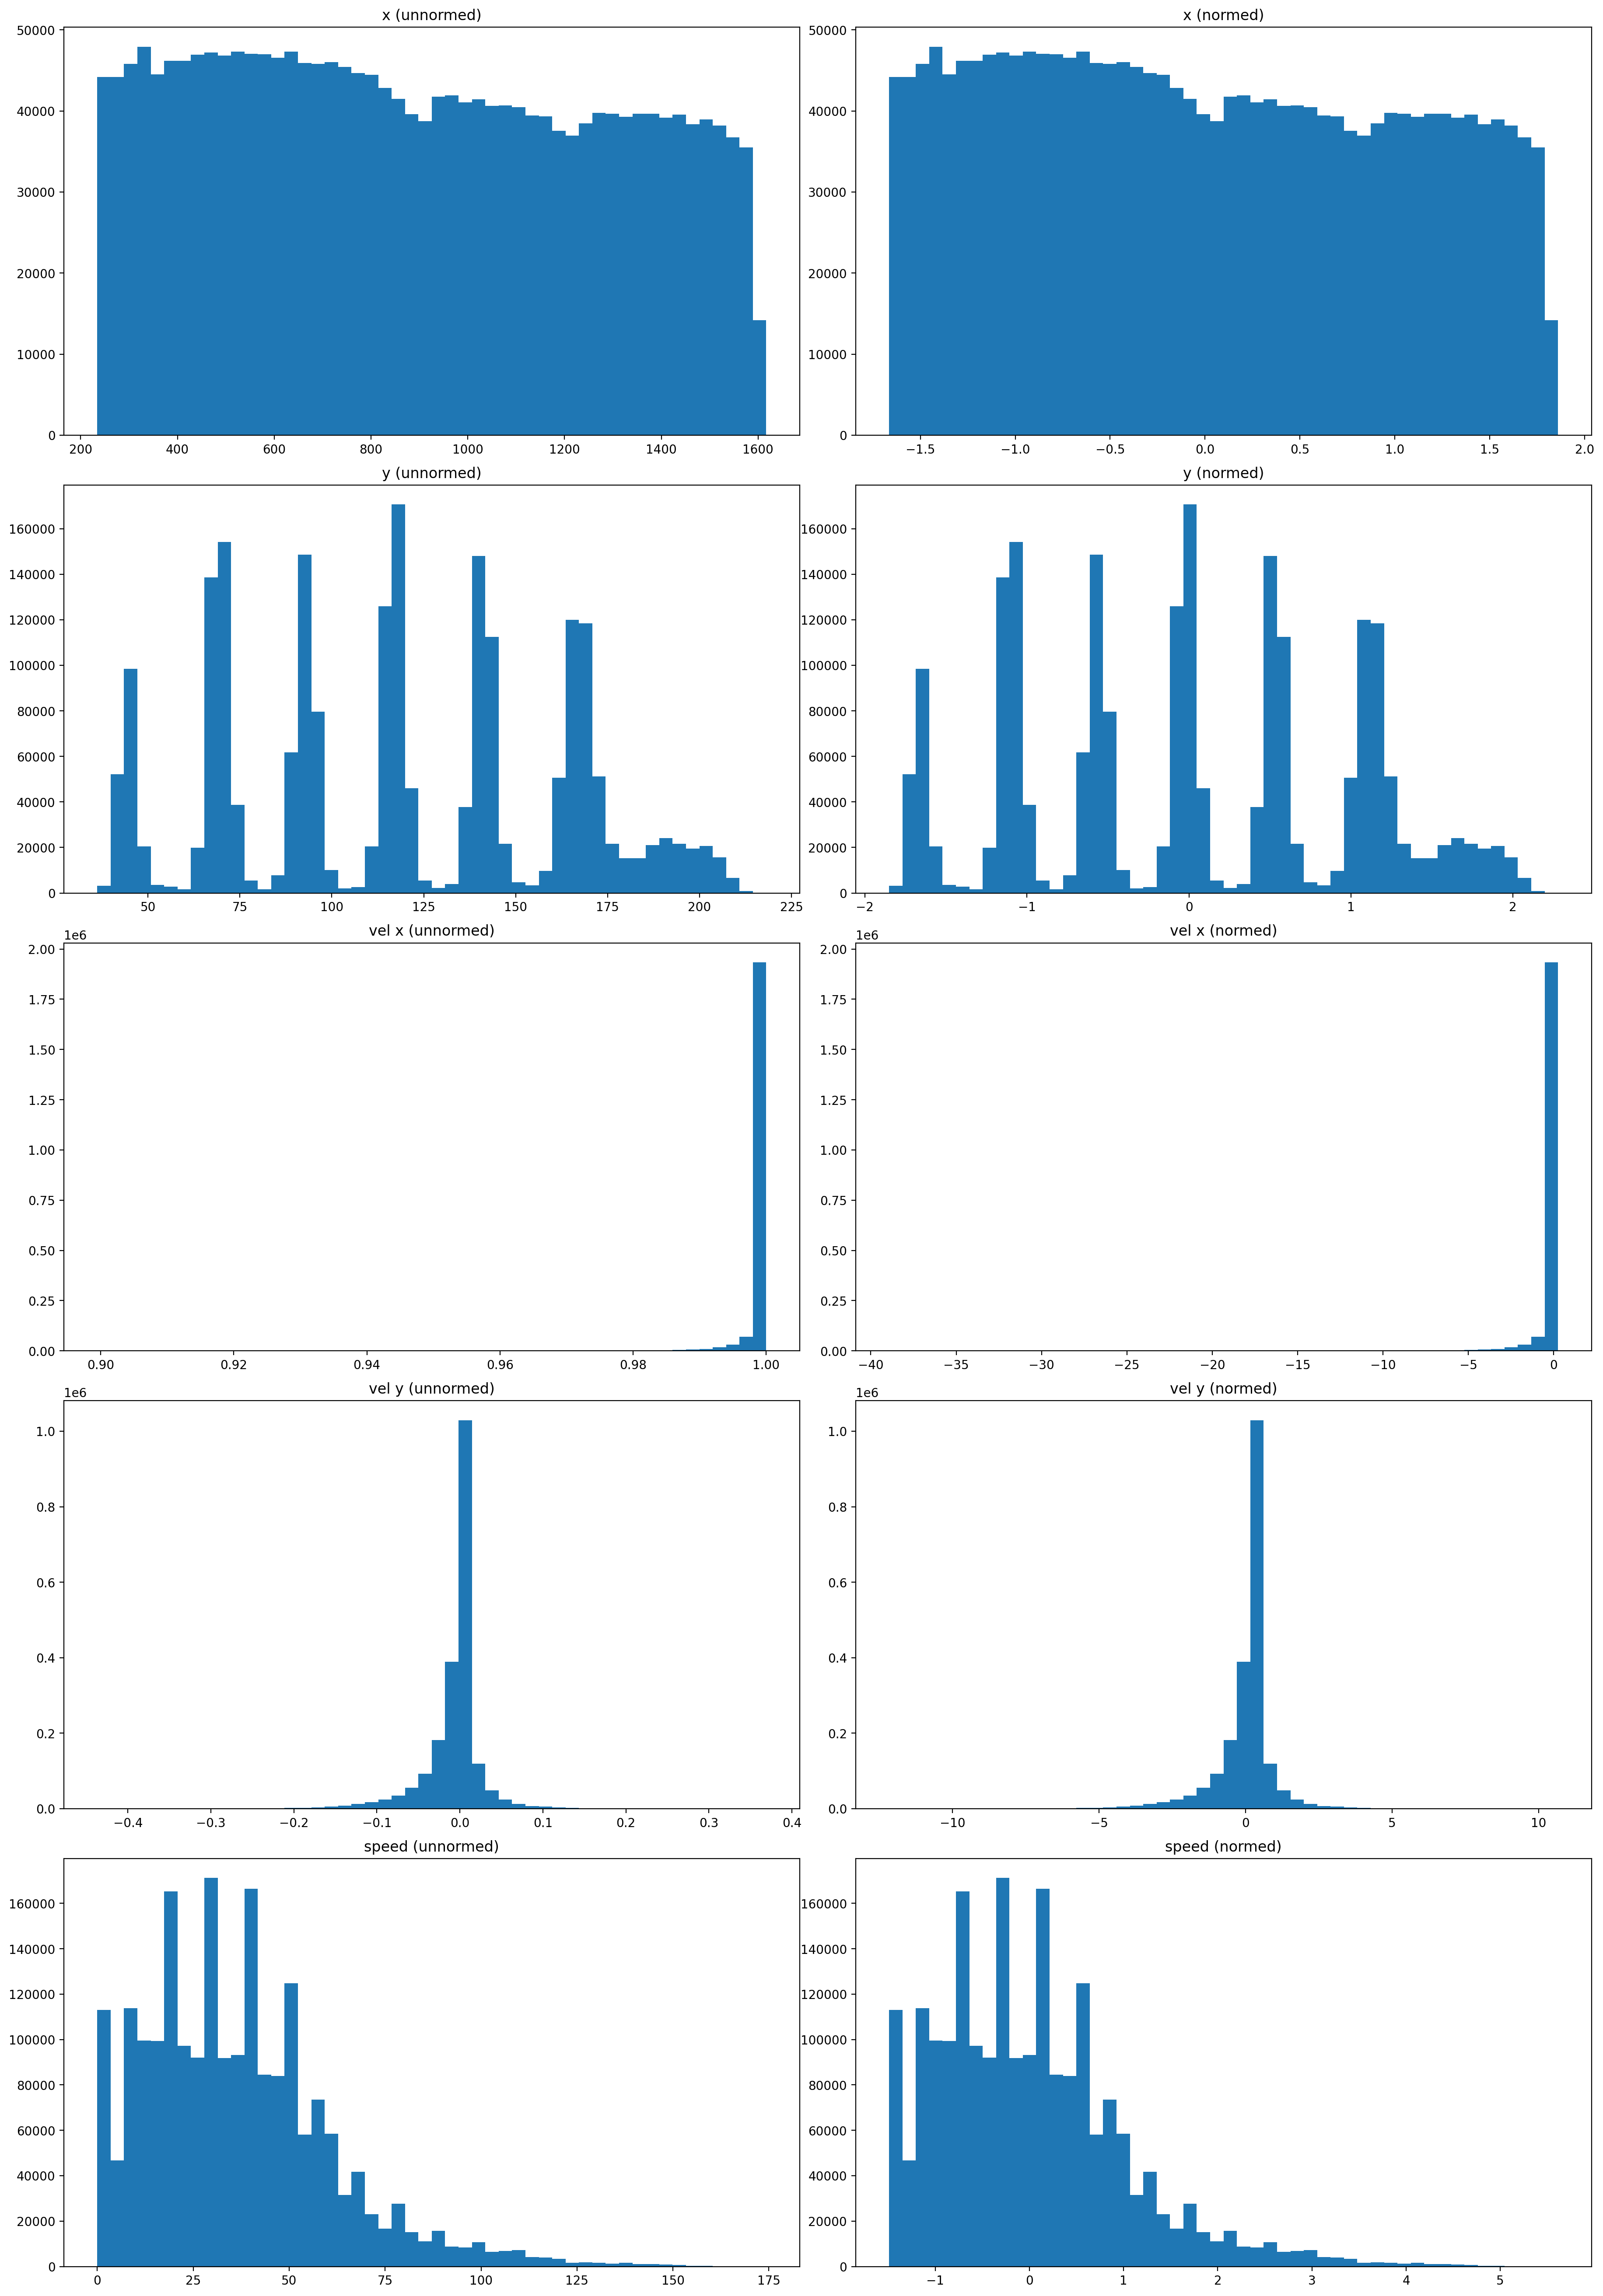

<Figure size 1200x800 with 0 Axes>

In [13]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(5, 2, dpi=200, figsize=(18, 26))
fig.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.figure(dpi=200)

mean = all_states.mean(dim=0)
std = all_states.std(dim=0)

ax[0][0].set_title('x (unnormed)')
ax[0][0].hist(all_states[:, 0], bins=50, label='acc')

ax[0][1].set_title('x (normed)')
ax[0][1].hist((all_states[:, 0] - mean[0]) / std[0], bins=50, label='acc')

ax[1][0].set_title('y (unnormed)')
ax[1][0].hist(all_states[:, 1], bins=50, label='turn')

ax[1][1].set_title('y (normed)')
ax[1][1].hist((all_states[:, 1] - mean[1]) / std[1], bins=50, label='turn')

ax[2][0].set_title('vel x (unnormed)')
ax[2][0].hist(all_states[:, 2], bins=50, label='turn')

ax[2][1].set_title('vel x (normed)')
ax[2][1].hist((all_states[:, 2] - mean[2]) / std[2], bins=50, label='turn')

ax[3][0].set_title('vel y (unnormed)')
ax[3][0].hist(all_states[:, 3], bins=50, label='turn')

ax[3][1].set_title('vel y (normed)')
ax[3][1].hist((all_states[:, 3] - mean[3]) / std[3], bins=50, label='turn')

ax[4][0].set_title('speed (unnormed)')
ax[4][0].hist(all_states[:, 4], bins=50, label='turn')

ax[4][1].set_title('speed (normed)')
ax[4][1].hist((all_states[:, 4] - mean[4]) / std[4], bins=50, label='turn')

In [14]:
all_diffs = torch.cat([k[1:] - k[:-1] for k in data_store.states], dim=0)[:, 0, :]

In [15]:
print(all_diffs.abs().max(dim=0))

torch.return_types.max(
values=tensor([1.7431e+01, 1.9581e+00, 1.4324e-02, 9.1782e-02, 4.0000e+00]),
indices=tensor([1240138,  301326,  301326,  401277,  543090]))


(array([2.000000e+00, 1.000000e+00, 0.000000e+00, 2.000000e+01,
        1.700000e+01, 1.900000e+01, 1.800000e+01, 4.100000e+01,
        9.900000e+01, 1.000000e+02, 2.000000e+02, 4.850000e+02,
        7.800000e+02, 1.320000e+03, 2.151000e+03, 3.101000e+03,
        4.968000e+03, 7.173000e+03, 1.215600e+04, 1.856300e+04,
        3.867900e+04, 7.829700e+04, 2.013520e+05, 5.027550e+05,
        1.082707e+06, 8.623900e+04, 2.413200e+04, 8.686000e+03,
        3.827000e+03, 1.854000e+03, 1.006000e+03, 6.120000e+02,
        3.340000e+02, 2.510000e+02, 1.390000e+02, 1.030000e+02,
        8.400000e+01, 4.400000e+01, 2.600000e+01, 9.000000e+00,
        1.300000e+01, 9.000000e+00, 1.100000e+01, 1.600000e+01,
        3.000000e+00, 4.000000e+00, 3.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([-16.511559  , -15.814905  , -15.118253  , -14.421599  ,
        -13.724946  , -13.028293  , -12.33164   , -11.634987  ,
        -10.9383335 , -10.241681  ,  -9.545028  ,  -8.848374  ,
  

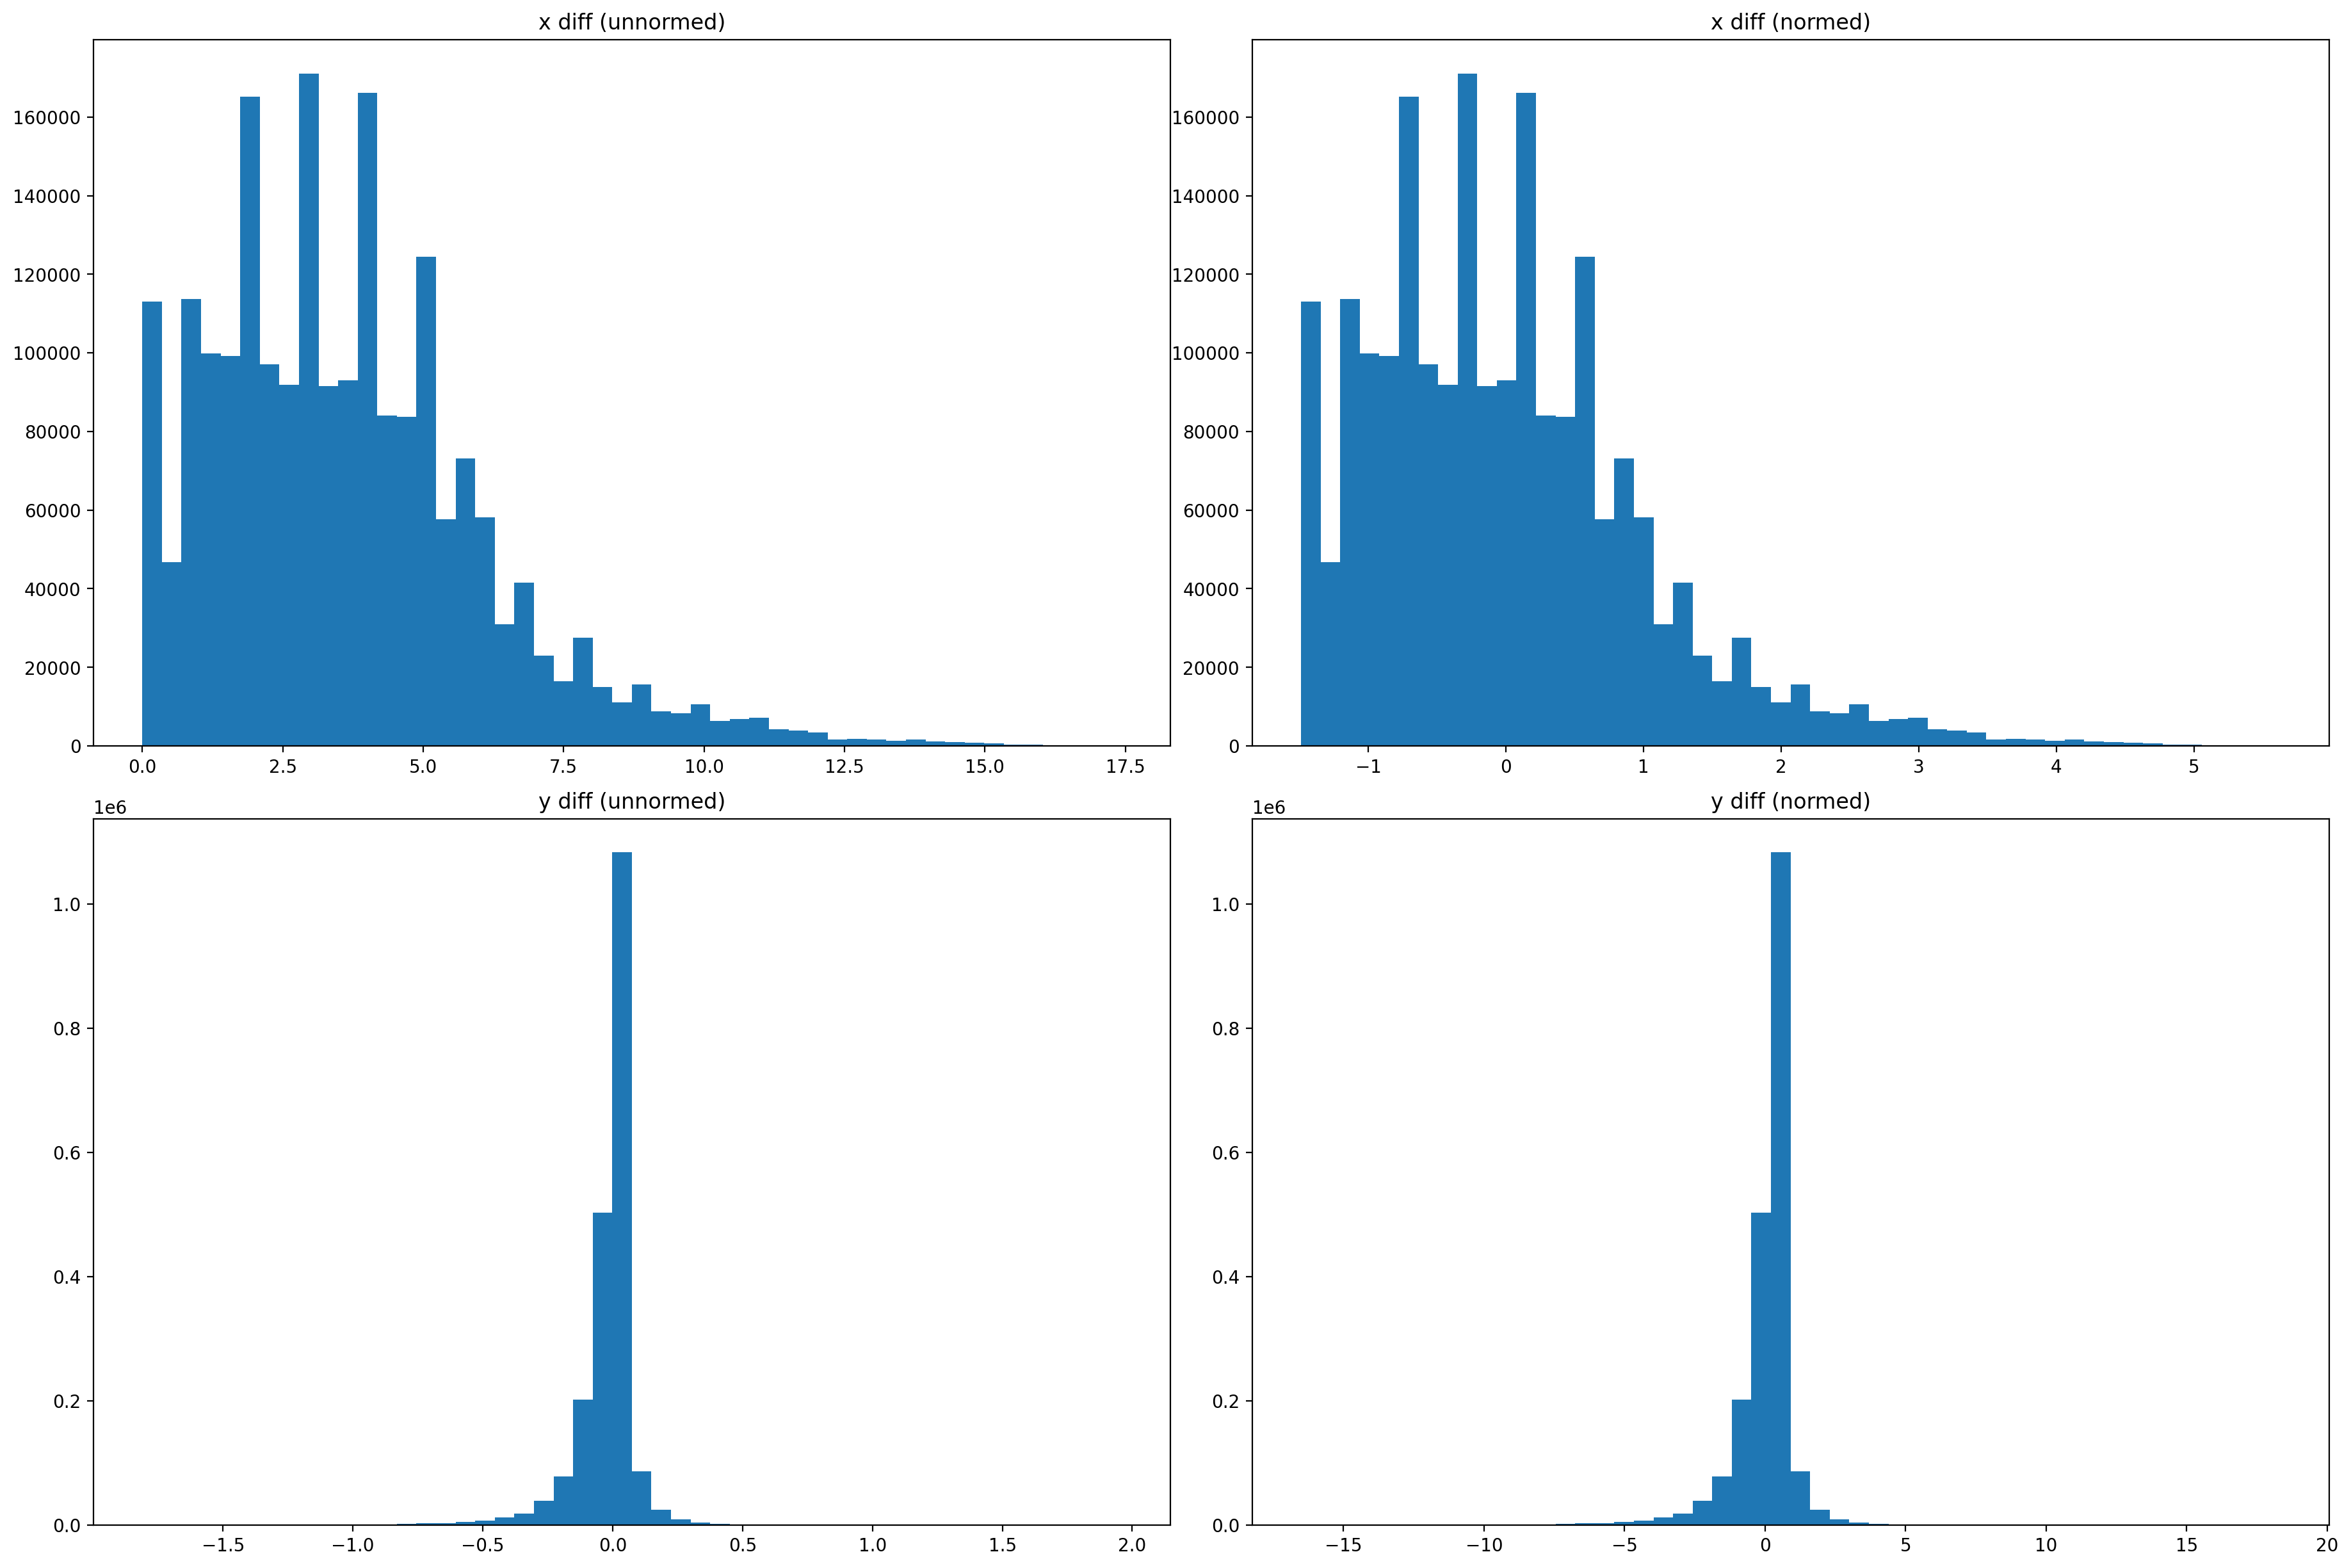

<Figure size 1200x800 with 0 Axes>

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2, dpi=200, figsize=(18, 12))
fig.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.figure(dpi=200)

mean = all_diffs.mean(dim=0)
std = all_diffs.std(dim=0)

ax[0][0].set_title('x diff (unnormed)')
ax[0][0].hist(all_diffs[:, 0], bins=50, label='acc')

ax[0][1].set_title('x diff (normed)')
ax[0][1].hist((all_diffs[:, 0] - mean[0]) / std[0], bins=50, label='acc')

ax[1][0].set_title('y diff (unnormed)')
ax[1][0].hist(all_diffs[:, 1], bins=50, label='turn')

ax[1][1].set_title('y diff (normed)')
ax[1][1].hist((all_diffs[:, 1] - mean[1]) / std[1], bins=50, label='turn')